<a href="https://colab.research.google.com/github/michaufsc/dengue1-4/blob/main/dengue_PARTES_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bioinformatics Project - Computational Drug Discovery [Part 1] Download Bioactivity Data **
Chanin Nantasenamat

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 1, we will be performing Data Collection and Pre-Processing from the ChEMBL Database.

Note for this Concised Version:

Redundant code cells were deleted.
Code cells for saving files to Google Drive has been deleted.

ChEMBL Database
The ChEMBL Database is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications. [Data as of March 25, 2020; ChEMBL version 26].

Installing libraries
Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [ ]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 596 kB 10.6 MB/s 
     |████████████████████████████████| 60 kB 6.9 MB/s 
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6349 sha256=3fc558330876af2c72658c511bc2459a3b5c8762415e7c4fea9a39b87148894d
  Stored in directory: /root/.cache/pip/wheels/88/96/68/c2be18e7406804be2e593e1c37845f2dd20ac2ce1381ce40b0
Successfully built easydict


In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

#BUSCANDO ALVOS PARA O VÍRUS DA DENGUE


In [ ]:
target = new_client.target
target_query = target.search('dengue virus')
targets = pd.DataFrame.from_dict(target_query)
targets

HttpApplicationError: ignored

Selecione e recupere dados de bioatividade para Dengue (primeira entrada)
Vamos atribuir a entrada 0 (que corresponde ao alvo) à variável selected_target

In [ ]:
selected_target = targets.target_chembl_id[6]
selected_target

'CHEMBL4295629'

Aqui, recuperaremos apenas dados de bioatividade para Dengue (CHEMBL613757) que são relatados como valores pChEMBL.

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,18297472,[],CHEMBL4123978,Inhibition of Dengue virus 4 NS5 full length R...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.34
1,None,18297475,[],CHEMBL4123975,Inhibition of Dengue virus 2 NS5 full length R...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.36
2,None,18297488,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,5.0
3,None,18297489,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,1.6
4,None,18297490,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,None,19235370,[],CHEMBL4398329,Inhibition of N-terminal His6-tagged DENV3 NS5...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,1.5
61,None,19235375,[],CHEMBL4398333,Inhibition of DENV2 2'-O-methyltransferase usi...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,21.0,2.3
62,None,19235376,[],CHEMBL4398334,Inhibition of DENV3 2'-O-methyltransferase usi...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,21.0,2.3
63,None,19440635,[],CHEMBL4431573,Inhibition of Dengue virus ribose 2'-O methylt...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.041


In [ ]:
df.to_csv('dengueprot_01_bioactivity_data_raw.csv', index=False)

Handling missing data
If any compounds has missing value for the standard_value and canonical_smiles column then drop it.

In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,18297472,[],CHEMBL4123978,Inhibition of Dengue virus 4 NS5 full length R...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.34
1,None,18297475,[],CHEMBL4123975,Inhibition of Dengue virus 2 NS5 full length R...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.36
2,None,18297488,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,5.0
3,None,18297489,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,1.6
4,None,18297490,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,None,19235370,[],CHEMBL4398329,Inhibition of N-terminal His6-tagged DENV3 NS5...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,1.5
61,None,19235375,[],CHEMBL4398333,Inhibition of DENV2 2'-O-methyltransferase usi...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,21.0,2.3
62,None,19235376,[],CHEMBL4398334,Inhibition of DENV3 2'-O-methyltransferase usi...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,21.0,2.3
63,None,19440635,[],CHEMBL4431573,Inhibition of Dengue virus ribose 2'-O methylt...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.041


In [ ]:
len(df2.canonical_smiles.unique())

62

In [ ]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,18297472,[],CHEMBL4123978,Inhibition of Dengue virus 4 NS5 full length R...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.34
1,None,18297475,[],CHEMBL4123975,Inhibition of Dengue virus 2 NS5 full length R...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.36
2,None,18297488,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,5.0
3,None,18297489,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,1.6
4,None,18297490,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,None,19235369,[],CHEMBL4398327,Inhibition of dengue virus NS5 RNA dependent R...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,2.1,1.7
60,None,19235370,[],CHEMBL4398329,Inhibition of N-terminal His6-tagged DENV3 NS5...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,1.5
61,None,19235375,[],CHEMBL4398333,Inhibition of DENV2 2'-O-methyltransferase usi...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,21.0,2.3
63,None,19440635,[],CHEMBL4431573,Inhibition of Dengue virus ribose 2'-O methylt...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.041


Pré-processamento de dados dos dados de bioatividade
Combine as 3 colunas (molecule_chembl_id.canonical_smiles,standard_value) e bioactivity_class em um DataFrame

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0
...,...,...,...
59,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,1700.0
60,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,1500.0
61,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,2300.0
63,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,41.0


In [ ]:
df3.to_csv('dengueprot_02_bioactivity_data_preprocessed.csv', index=False)

Rotulagem de compostos como sendo ativos, inativos ou intermediários
Os dados de bioatividade estão na unidade IC50. Compostos com valores inferiores a 1000 nM serão considerados ativos, enquanto aqueles maiores que 10.000 nM serão considerados inativos. Quanto a esses valores entre 1.000 e 10.000 nM serão referidos como intermediários.

In [ ]:
df4 = pd.read_csv('dengueprot_02_bioactivity_data_preprocessed.csv')

In [ ]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0,intermediate
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0,intermediate
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0,intermediate
...,...,...,...,...
57,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,1700.0,intermediate
58,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,1500.0,intermediate
59,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,2300.0,intermediate
60,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,41.0,active


In [ ]:
df5.to_csv('dengueprot_03_bioactivity_data_curated.csv', index=False)

In [ ]:
! zip dengue.zip *.csv

  adding: dengueprot_01_bioactivity_data_raw.csv (deflated 88%)
  adding: dengueprot_02_bioactivity_data_preprocessed.csv (deflated 77%)
  adding: dengueprot_03_bioactivity_data_curated.csv (deflated 79%)


In [ ]:
! ls -l

total 72
-rw-r--r-- 1 root root 39327 Jul 20 03:39 dengueprot_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root  5479 Jul 20 03:39 dengueprot_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root  6107 Jul 20 03:39 dengueprot_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root  7742 Jul 20 03:39 dengue.zip
drwx------ 5 root root  4096 Jul 20 03:32 drive
drwxr-xr-x 1 root root  4096 Jul 13 13:43 sample_data


Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis

In Part 2, we will be performing Descriptor Calculation and Exploratory Data Analysis.



Install conda and rdkit 
#RDKit is a collection of cheminformatics and machine-learning software written in C++ and Python.

# Nova seção

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-08-09 18:43:46--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  71.5MB/s    in 1.1s    

2022-08-09 18:43:47 (71.5 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling

In [ ]:
! wget /content/dengueprot_03_bioactivity_data_curated.csv

/content/dengueprot_03_bioactivity_data_curated.csv: Scheme missing.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('dengueprot_03_bioactivity_data_curated.csv')
df

FileNotFoundError: ignored

In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL4126343,340.0,active,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...
1,CHEMBL3417270,360.0,active,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...
2,CHEMBL521487,5000.0,intermediate,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...
3,CHEMBL4127092,1600.0,intermediate,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...
4,CHEMBL4127819,2000.0,intermediate,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...
...,...,...,...,...
57,CHEMBL269277,1700.0,intermediate,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...
58,CHEMBL4526128,1500.0,intermediate,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...
59,CHEMBL1418094,2300.0,intermediate,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...
60,CHEMBL1214186,41.0,active,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...


DESCRITORES LIPINSKI

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,531.204,-1.13022,7.0,14.0
1,524.169,-1.57400,7.0,14.0
2,498.167,-2.11080,7.0,12.0
3,508.162,-2.49750,7.0,12.0
4,522.189,-2.10740,7.0,12.0
...,...,...,...,...
57,456.711,7.08950,2.0,2.0
58,582.678,6.02400,3.0,7.0
59,500.507,3.13144,6.0,9.0
60,381.393,-2.06280,6.0,11.0


Combine DataFrames
Let's take a look at the 2 DataFrames that will be combine

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,531.204,-1.13022,7.0,14.0
1,524.169,-1.57400,7.0,14.0
2,498.167,-2.11080,7.0,12.0
3,508.162,-2.49750,7.0,12.0
4,522.189,-2.10740,7.0,12.0
...,...,...,...,...
57,456.711,7.08950,2.0,2.0
58,582.678,6.02400,3.0,7.0
59,500.507,3.13144,6.0,9.0
60,381.393,-2.06280,6.0,11.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0,intermediate
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0,intermediate
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0,intermediate
...,...,...,...,...
57,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,1700.0,intermediate
58,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,1500.0,intermediate
59,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,2300.0,intermediate
60,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,41.0,active


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active,531.204,-1.13022,7.0,14.0
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active,524.169,-1.57400,7.0,14.0
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0,intermediate,498.167,-2.11080,7.0,12.0
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0,intermediate,508.162,-2.49750,7.0,12.0
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0,intermediate,522.189,-2.10740,7.0,12.0
...,...,...,...,...,...,...,...,...
57,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,1700.0,intermediate,456.711,7.08950,2.0,2.0
58,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,1500.0,intermediate,582.678,6.02400,3.0,7.0
59,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,2300.0,intermediate,500.507,3.13144,6.0,9.0
60,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,41.0,active,381.393,-2.06280,6.0,11.0


Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
df_combined.standard_value.describe()

count        62.000000
mean      94504.790323
std      146546.895941
min          16.000000
25%        2650.000000
50%       14950.000000
75%      135500.000000
max      452000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

In [ ]:

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.


In [ ]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,active,531.204,-1.13022,7.0,14.0,340.0
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,active,524.169,-1.57400,7.0,14.0,360.0
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,intermediate,498.167,-2.11080,7.0,12.0,5000.0
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,intermediate,508.162,-2.49750,7.0,12.0,1600.0
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,intermediate,522.189,-2.10740,7.0,12.0,2000.0
...,...,...,...,...,...,...,...,...
57,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,intermediate,456.711,7.08950,2.0,2.0,1700.0
58,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,intermediate,582.678,6.02400,3.0,7.0,1500.0
59,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,intermediate,500.507,3.13144,6.0,9.0,2300.0
60,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,active,381.393,-2.06280,6.0,11.0,41.0


In [ ]:
df_norm.standard_value_norm.describe()

count        62.000000
mean      94504.790323
std      146546.895941
min          16.000000
25%        2650.000000
50%       14950.000000
75%      135500.000000
max      452000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,active,531.204,-1.13022,7.0,14.0,6.468521
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,active,524.169,-1.57400,7.0,14.0,6.443697
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,intermediate,498.167,-2.11080,7.0,12.0,5.301030
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,intermediate,508.162,-2.49750,7.0,12.0,5.795880
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,intermediate,522.189,-2.10740,7.0,12.0,5.698970
...,...,...,...,...,...,...,...,...
57,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,intermediate,456.711,7.08950,2.0,2.0,5.769551
58,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,intermediate,582.678,6.02400,3.0,7.0,5.823909
59,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,intermediate,500.507,3.13144,6.0,9.0,5.638272
60,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,active,381.393,-2.06280,6.0,11.0,7.387216


In [ ]:
df_final.pIC50.describe()

count    62.000000
mean      4.843798
std       1.052163
min       3.344862
25%       3.870880
50%       4.826062
75%       5.576980
max       7.795880
Name: pIC50, dtype: float64

In [ ]:
df_final.to_csv('dengueprot_04_bioactivity_data_3class_pIC50.csv')

Removing the 'intermediate' bioactivity class
Here, we will be removing the intermediate class from our data set.

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,active,531.204,-1.13022,7.0,14.0,6.468521
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,active,524.169,-1.57400,7.0,14.0,6.443697
5,CHEMBL486231,C[C@@]1(F)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,inactive,500.158,-1.13360,6.0,11.0,4.744727
6,CHEMBL4127921,C#C[C@@]1(F)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,inactive,510.153,-1.52030,6.0,11.0,4.798603
7,CHEMBL4129313,CC#C[C@@]1(F)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,inactive,524.180,-1.13020,6.0,11.0,4.698970
9,CHEMBL4125966,C#C[C@@]1(O)[C@H](O)[C@@](F)(COP(=O)(O)OP(=O)(...,active,526.152,-2.20030,7.0,12.0,6.187087
11,CHEMBL4282493,COc1cc(C)c(C(=O)NS(=O)(=O)c2cccc3cccnc23)cc1-c...,active,492.578,3.74282,2.0,7.0,7.795880
12,CHEMBL4287909,O=C(OC1=CS(=O)(=O)Nc2ccc(Oc3ccccc3Br)cc21)c1cc...,inactive,472.316,5.15210,1.0,5.0,4.511449
17,CHEMBL4291731,COc1cccc(Oc2ccc3c(c2)C(OC(=O)c2ccccc2)=CS(=O)(...,inactive,423.446,4.39820,1.0,6.0,4.692504
18,CHEMBL4277678,CC(C)(C)c1cccc(Oc2ccc3c(c2)C(OC(=O)c2ccccc2)=C...,inactive,449.528,5.68710,1.0,5.0,4.801343


In [ ]:
df_2class.to_csv('dengueprotein_05_bioactivity_data_2class_pIC50.csv')

Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors
Import library

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Frequency plot of the 2 bioactivity classes

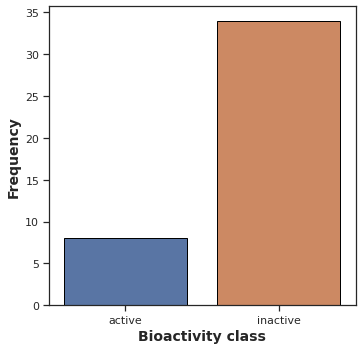

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

Scatter plot of MW versus LogP
It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

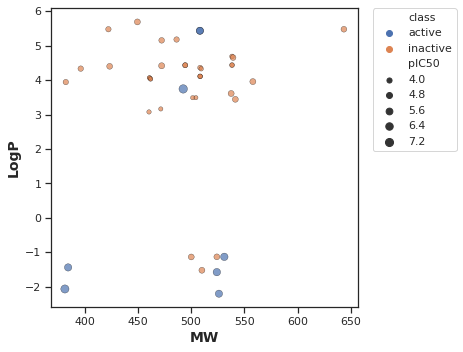

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

Box plots
pIC50 value

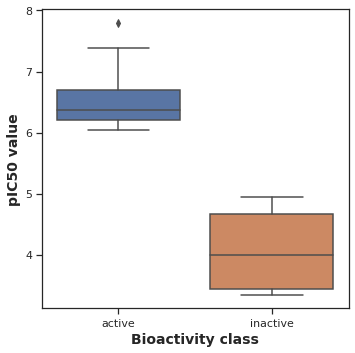

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Statistical analysis | Mann-Whitney U Test

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,272.0,0.000014,0.05,Different distribution (reject H0)


MW

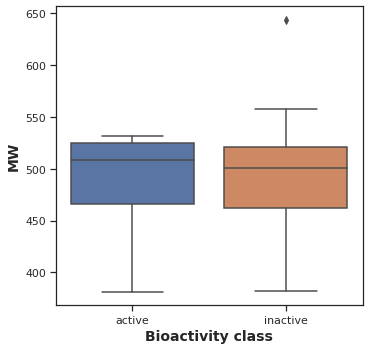

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,130.0,0.860058,0.05,Same distribution (fail to reject H0)


LogP

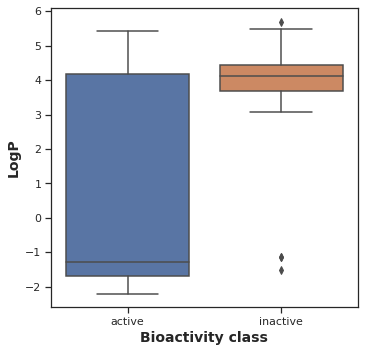

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

Statistical analysis | Mann-Whitney U Test

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,74.0,0.048803,0.05,Different distribution (reject H0)


NumHDonors

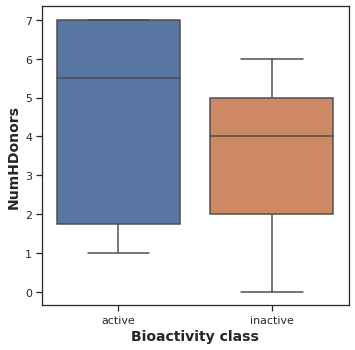

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

Statistical analysis | Mann-Whitney U Test

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,181.5,0.14388,0.05,Same distribution (fail to reject H0)


NumHAcceptors

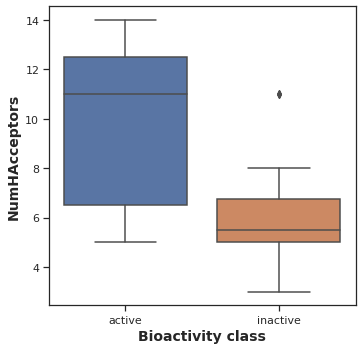

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:

mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,214.5,0.009712,0.05,Different distribution (reject H0)



Interpretation of Statistical Results
Box Plots
pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors
All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.






Zip files

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

	zip warning: name not matched: drive/MyDrive/botânica econômica/Árvores Brasileiras (Lorenzi) - volume 3.pdf
	zip warning: name not matched: drive/MyDrive/botânica econômica/Árvores Brasileiras (Lorenzi) - volume 1.pdf
	zip warning: name not matched: drive/MyDrive/botânica econômica/Árvores Brasileiras (Lorenzi) - volume 2.pdf
Scanning files ...................

[Part 3] Descriptor Calculation and Dataset Preparation

In Part 3, we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we will be preparing this into a dataset for subsequent model building in Part 4.


Download PaDEL-Descriptor

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

In [ ]:
! unzip padel.zip

Load bioactivity data
Download the curated ChEMBL bioactivity data that has been pre-processed from Parts 1 and 2 of this Bioinformatics Project series. Here we will be using the bioactivity_data_3class_pIC50.csv file that essentially contain the pIC50 values that we will be using for building a regression model.

In [ ]:
! wget /content/dengueprot_04_bioactivity_data_3class_pIC50.csv

/content/dengueprot_04_bioactivity_data_3class_pIC50.csv: Scheme missing.


In [ ]:
import pandas as pd

In [ ]:
df3 = pd.read_csv('dengueprot_04_bioactivity_data_3class_pIC50.csv')

In [ ]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,active,531.204,-1.13022,7.0,14.0,6.468521
1,1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,active,524.169,-1.57400,7.0,14.0,6.443697
2,2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,intermediate,498.167,-2.11080,7.0,12.0,5.301030
3,3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,intermediate,508.162,-2.49750,7.0,12.0,5.795880
4,4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,intermediate,522.189,-2.10740,7.0,12.0,5.698970
...,...,...,...,...,...,...,...,...,...
57,57,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,intermediate,456.711,7.08950,2.0,2.0,5.769551
58,58,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,intermediate,582.678,6.02400,3.0,7.0,5.823909
59,59,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,intermediate,500.507,3.13144,6.0,9.0,5.638272
60,60,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,active,381.393,-2.06280,6.0,11.0,7.387216


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)[C@H]1O	CHEMBL4126343
[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@@H](n2ccc(N)nc2=O)[C@H](O)[C@@H]1O	CHEMBL3417270
C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@H]1n1ccc(=O)[nH]c1=O	CHEMBL521487
C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@H]1n1ccc(=O)[nH]c1=O	CHEMBL4127092
CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@H]1n1ccc(=O)[nH]c1=O	CHEMBL4127819


In [ ]:
! cat molecule.smi | wc -l

62


Calculate fingerprint descriptors
Calculate PaDEL descriptors

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

In [ ]:
! ls -l

Preparing the X and Y Data Matrices
X data matrix

In [ ]:

df3_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df3_X

In [ ]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

Y variable
Convert IC50 to pIC50

In [ ]:
df3_Y = df3['pIC50']
df3_Y

Combining X and Y variable

In [ ]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

In [ ]:
dataset3.to_csv('dengueprot_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

Let's download the CSV file to your local computer for the Part 3B (Model Building).

[Part 4] Regression Models with Random Forest

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

load the dataset

In [ ]:
! wget /content/dengueprot_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

In [ ]:
df = pd.read_csv('dengueprot_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

3. Input features

In [ ]:
X = df.drop('pIC50', axis=1)
X


3.2. Output features

In [ ]:
Y = df.pIC50
Y

In [ ]:
X.shape

In [ ]:
Y.shape

 Remove low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

Data split (80/20 ratio)

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:

X_train.shape, Y_train.shape

In [ ]:
X_test.shape, Y_test.shape

Building a Regression Model using Random Forest

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

In [ ]:
Y_pred = model.predict(X_test)

6. Scatter Plot of Experimental vs Predicted pIC50 Values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

 [Part 5] Comparing Regressors